In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob

import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
import astropy.units as u
from astropy.cosmology import Planck18, z_at_value

In [2]:
import matplotlib

font = {'family' : 'serif',
        'size'   : 16}

matplotlib.rc('font', **font)


In [3]:
plotdir = 'powerlaw_3.5_plots/'

In [4]:
Mc_files = ['powerlaw_3.5_lams/powerlaw_alpha_3.5_lam_0_1_eta_0_1296.csv']



df1 = pd.DataFrame()
for fi in Mc_files:
    df_temp = pd.read_csv(fi)
    df1 = df1.append(df_temp)
# drop the zero rows that resulted from NoneType Networks
df = df1.loc[~(df1==0).all(axis=1)]


In [5]:
# drop the zero rows that resulted from NoneType Networks
# df = df.loc[~(df==0).all(axis=1)]
df = df[df["Mc"] > 0]

df = df[df["bias_0"]/df["eta_stat_err"] < 0.1]

print("Total number of events:",len(df))


df

Total number of events: 1296


,Mc,eta,DL,z,m1,m2,M_tot,q,snr,inspiral_t,...,inner_10,inner_11,inner_12,inner_13,inner_14,inner_15,inner_16,inner_17,inner_18,inner_19
0,17.050911,0.228697,34104.741036,3.763632,26.692877,14.630119,41.322996,1.824515,13.076655,79.648600,...,0.928975,0.919453,0.910551,0.902395,0.895032,0.888444,0.882546,0.877206,0.872261,0.867530
1,16.784046,0.231933,27335.054235,3.126338,25.588903,14.745827,40.334730,1.735332,9.868996,81.818906,...,0.930560,0.921288,0.912631,0.904706,0.897558,0.891162,0.885434,0.880242,0.875421,0.870795
2,20.300047,0.204987,26062.223477,3.004439,37.414559,15.121965,52.536523,2.474186,15.783481,59.147570,...,0.910668,0.898328,0.886710,0.876003,0.866309,0.857645,0.849946,0.843078,0.836857,0.831071
3,21.224505,0.233727,46501.921384,4.894599,31.861938,18.908681,50.770620,1.685043,12.084155,55.136060,...,0.908157,0.896006,0.884759,0.874598,0.865599,0.857741,0.850914,0.844934,0.839569,0.834564
4,7.323988,0.188044,13486.523547,1.745903,14.949309,5.012128,19.961437,2.982627,10.051910,325.965125,...,0.974710,0.970829,0.966985,0.963216,0.959544,0.955976,0.952504,0.949109,0.945764,0.942440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,9.785022,0.160009,32653.967702,3.628462,23.504851,5.876751,29.381603,3.999634,6.510200,200.548301,...,0.961962,0.956080,0.950261,0.944573,0.939063,0.933752,0.928641,0.923709,0.918923,0.914237
1292,17.955595,0.240461,21934.552878,2.603526,25.236671,16.988637,42.225308,1.485503,22.972455,73.133180,...,0.924839,0.915019,0.905933,0.897702,0.890368,0.883888,0.878155,0.873007,0.868252,0.863685
1293,20.008450,0.234567,24527.086516,2.856391,29.812325,17.946407,47.758731,1.661186,20.464452,60.910698,...,0.814975,0.804571,0.800136,0.801226,0.806771,0.815258,0.824954,0.834125,0.841207,0.844929
1294,23.733902,0.246706,12217.745825,1.610813,30.635379,24.326469,54.961848,1.259343,31.697173,45.754464,...,0.895038,0.881620,0.869393,0.858554,0.849170,0.841181,0.834420,0.828634,0.823516,0.818741


In [6]:
n_lams = 20
lam_colnames = ['lam_'+str(id) for id in range(n_lams)]
lams = df[lam_colnames].iloc[0].values

bias_colnames = ['bias_'+str(id) for id in range(n_lams)]
bias_lams = df[bias_colnames]
rel_bias_lams = df[bias_colnames].div(df["eta"], axis='rows')

sig_bias_lams = df[bias_colnames].div(df["eta_stat_err"], axis='rows')

inner_colnames = ['inner_'+str(id) for id in range(n_lams)]
inner_prod_lams = df[inner_colnames]

rel_bias_lams

,bias_0,bias_1,bias_2,bias_3,bias_4,bias_5,bias_6,bias_7,bias_8,bias_9,bias_10,bias_11,bias_12,bias_13,bias_14,bias_15,bias_16,bias_17,bias_18,bias_19
0,5.903602e-15,0.000113,0.000388,0.000957,0.001877,0.003108,0.004509,0.005849,0.006842,0.007192,0.006639,0.005009,0.002243,0.001587,0.006281,0.011536,0.016983,0.022235,0.026928,0.030764
1,5.946664e-15,0.000139,0.000385,0.000767,0.001289,0.001911,0.002538,0.003032,0.003221,0.002925,0.001983,0.000282,0.002220,0.005479,0.009367,0.013677,0.018145,0.022480,0.026390,0.029615
2,5.033454e-15,0.000367,0.001169,0.002593,0.004723,0.007498,0.010695,0.013947,0.016780,0.018683,0.019180,0.017908,0.014672,0.009481,0.002556,0.005698,0.014740,0.023959,0.032747,0.040561
3,5.189621e-15,0.000264,0.000942,0.002248,0.004232,0.006748,0.009466,0.011916,0.013565,0.013910,0.012569,0.009353,0.004312,0.002265,0.009879,0.017892,0.025607,0.032369,0.037637,0.041051
4,3.293087e-15,0.000071,0.000213,0.000477,0.000887,0.001431,0.002059,0.002691,0.003227,0.003562,0.003599,0.003270,0.002539,0.001416,0.000050,0.001773,0.003642,0.005535,0.007330,0.008923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,5.619123e-16,0.000133,0.000363,0.000755,0.001333,0.002074,0.002905,0.003710,0.004348,0.004674,0.004556,0.003904,0.002680,0.000909,0.001325,0.003884,0.006594,0.009265,0.011712,0.013774
1292,5.845534e-15,0.000188,0.000702,0.001729,0.003324,0.005377,0.007623,0.009677,0.011101,0.011477,0.010482,0.007955,0.003925,0.001375,0.007544,0.014063,0.020369,0.025929,0.030309,0.033220
1293,4.769692e-15,0.000317,0.000293,0.000207,0.001090,0.002065,0.002757,0.002863,0.002311,0.001354,0.000557,0.000670,0.002412,0.006230,0.012092,0.019400,0.027049,0.033643,0.037815,0.038574
1294,5.333770e-15,0.000271,0.001084,0.002709,0.005196,0.008341,0.011701,0.014661,0.016536,0.016698,0.014691,0.010323,0.003717,0.004696,0.014229,0.024035,0.033226,0.040992,0.046705,0.049987


In [7]:
def plot_bias_features(x, y, feature, show_unbiased=False, mtot=None, qmax=None, colormap='RdBu_r',\
        xlabel="Mc ($M_\odot$)", ylabel="$\eta", cbar_label="Faithfulness",\
        title="Minimum Faithfulness required \nfor unbiased Mc", xlim=None, ylim=None, plt_show=True, savefig=None, **kwargs):
    
    mask = np.ones(len(df["Mc"]), dtype=bool)
    z = df["z"].iloc[0]

    if qmax is not None:
        mask = mask * (df["q"] < qmax) 
        title = title + " (q < " + str(np.round(qmax,2)) + ")"
    
    x = x[mask]
    y = y[mask]
    feature = feature[mask]

    fig, ax = plt.subplots(figsize=(8, 6))
    cm = plt.cm.get_cmap(colormap)

    sc = plt.scatter(x, y, c=feature, cmap=cm, **kwargs)
    cbar = plt.colorbar(sc)
    cbar.set_label(cbar_label)

    if show_unbiased:
        unbiased_mask = (df["Mc_stat_err"]>df["bias_9"])
        plt.scatter(x[unbiased_mask*mask], y[unbiased_mask*mask], c="white",  s=100, edgecolors='g', lw=3, label='Unbiased')
        plt.legend()

    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.tight_layout()

    if savefig is not None:
        plt.savefig(plotdir+savefig+'.pdf')
    if plt_show:
        plt.show()


# Bias Stuff

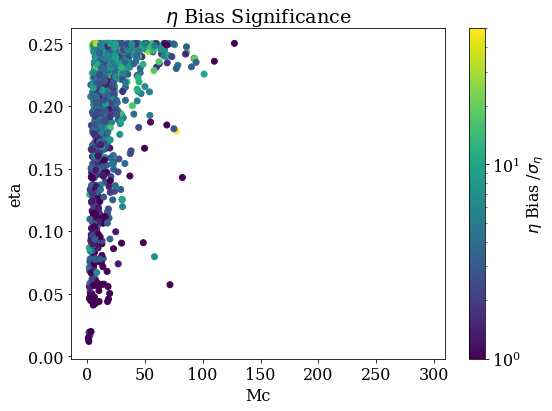

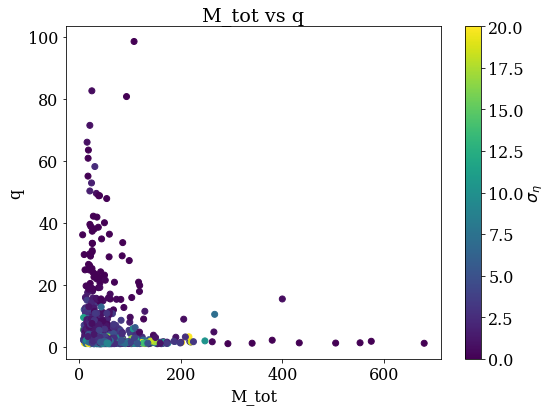

In [8]:
plot_bias_features(df["Mc"], df["eta"], df["eta_full_bias"]/df["eta_stat_err"], colormap="viridis",\
    title="$\eta$ Bias Significance", xlabel="Mc", ylabel="eta", cbar_label="$\eta$ Bias /$\sigma_{\eta}$", norm=matplotlib.colors.LogNorm(1, 50), savefig='eta_bias_sig_distribution')

plot_bias_features(df["M_tot"], df["q"], df["eta_full_bias"]/df["eta_stat_err"], colormap="viridis",\
    title="M_tot vs q", xlabel="M_tot", ylabel="q", cbar_label="$\sigma_{\eta}$", vmin=0, vmax=20)

All the events (so far) are biased more than 1 $\sigma$. The significance of the bias seems to be larger for migh Mc, unequal masses.

## $\eta$ biases over lambda grid

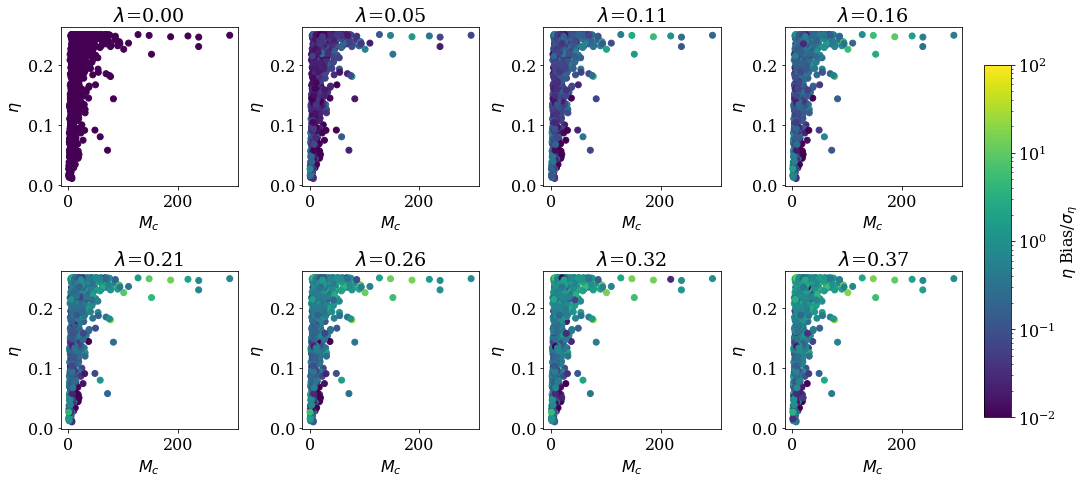

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))
lams_range = lams[:8]

for i, lam in enumerate(lams_range):
    ax = axes.flat[i]
    x= df["Mc"]
    y= df["eta"]
    c = df[f"bias_{i}"]/df["eta_stat_err"]
    colormap="viridis"
    sc = ax.scatter(x,y, c=c, cmap=colormap, norm=matplotlib.colors.LogNorm(0.01, 100))
    ax.set_ylabel("$\eta$")
    ax.set_xlabel("$M_c$")
    ax.set_title(f"$\lambda$={lams_range[i]:.2f}")

plt.tight_layout()

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.025, 0.7])
fig.colorbar(sc, cax=cbar_ax, label="$\eta$ Bias/$\sigma_{\eta}$")

plt.savefig(plotdir+'eta_bias_sig_vs_lambda_grid.pdf')
plt.show()
    

## Avg Bias vs Lambda

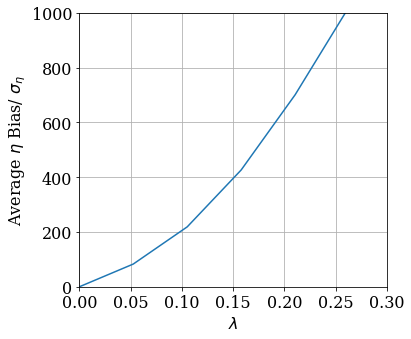

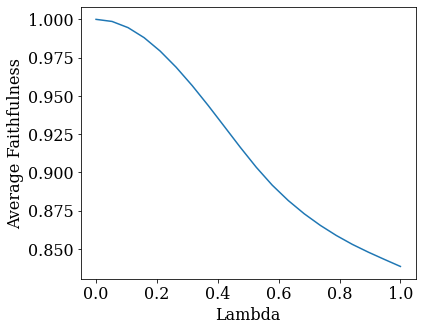

In [11]:
fig, ax = plt.subplots(figsize=(6, 5))

avg_bias_sig = np.sum(sig_bias_lams, axis=0)
plt.plot(lams, avg_bias_sig)

plt.xlim(0, 0.3)
plt.ylim(0, 1000)
plt.xlabel("$\lambda$")
plt.ylabel("Average $\eta$ Bias/ $\sigma_{\eta}$")
plt.grid()
plt.tight_layout()
plt.savefig(plotdir+"avg_eta_bias_vs_lambda.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))

average_inner_prods =np.average(inner_prod_lams, axis=0)
plt.plot(lams, average_inner_prods)

plt.xlabel("Lambda")
plt.ylabel("Average Faithfulness")
plt.show()

## fraction of unbiased events vs lambda

In [12]:
unbiased_frac = np.zeros(n_lams)
for i in range(n_lams):
    bias = bias_lams.iloc[:,i].values
    stat_err = df["eta_stat_err"].values
    unbiased_mask = (bias < stat_err)
    unbiased_frac[i] = np.sum(unbiased_mask)/len(df["Mc"])


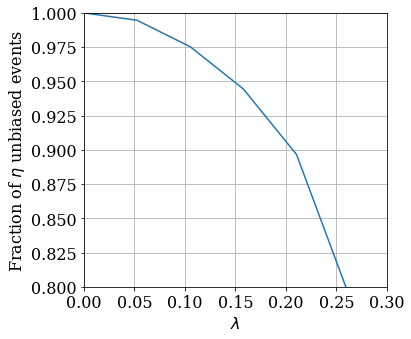

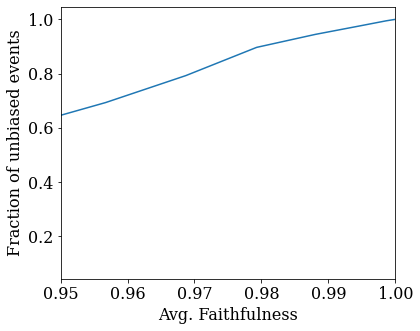

In [13]:
fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(lams, unbiased_frac)
plt.xlabel("$\lambda$")
plt.ylabel("Fraction of $\eta$ unbiased events")
plt.xlim(0, 0.3)
plt.ylim(0.8, 1.0)
plt.grid()
plt.tight_layout()
plt.savefig(plotdir+"eta_frac_unbiased_vs_lambda.pdf")
plt.show()

fig, ax = plt.subplots(figsize=(6, 5))
plt.plot(average_inner_prods, unbiased_frac)
plt.xlabel("Avg. Faithfulness")
plt.ylabel("Fraction of unbiased events")
plt.xlim(0.95, 1)
plt.show()